In [15]:
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

print("All imports successful!")


All imports successful!


In [16]:
df_age = pd.read_csv("C:/Users/Hello/OneDrive/Desktop/age project/data/train_age.csv")
df_gen = pd.read_csv("C:/Users/Hello/OneDrive/Desktop/age project/data/train_gender.csv")

print(df_age.head())
print(df_gen.head())

   imageId   age
0        0  89.0
1        1  72.0
2        2  25.0
3        3  68.0
4        4  37.0
   imageId  gender
0        0       0
1        1       0
2        2       1
3        3       1
4        4       0


In [17]:
im=[]
for i in tqdm(sorted(os.listdir("C:/Users/Hello/OneDrive/Desktop/age project/data/kaggle/kaggle/train/"))):
    img = cv2.imread('C:/Users/Hello/OneDrive/Desktop/age project/data/kaggle/kaggle/train/'+i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = 255-img # creating the negative of the image
    img = cv2.resize(img,(128, 128))
    im.append(img)
    #img.append(plt.imread(dir+'kaggle/kaggle/train/'+i))
age = df_age['age']
gen= df_gen['gender']
data ={'Image': im,'Age':age,'Gender':gen}
        

  0%|          | 0/10702 [00:00<?, ?it/s]

100%|██████████| 10702/10702 [02:55<00:00, 60.90it/s]


In [18]:
df = pd.DataFrame(data)

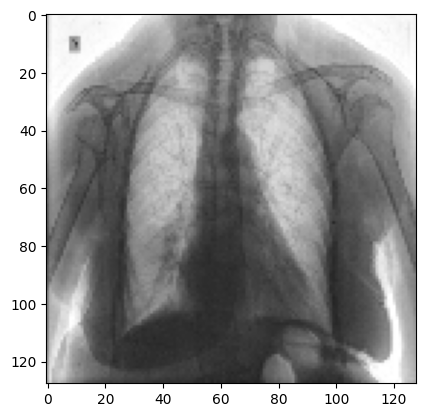

In [19]:
plt.imshow(cv2.cvtColor(df['Image'].iloc[0], cv2.COLOR_BGR2RGB))

# Gender Prediction

In [20]:
X = np.array(data['Image'])
y = np.array(data['Gender'])

X = X.reshape((X.shape[0],X.shape[1],X.shape[2],1))
y = y.reshape(-1,1)
X = X/255
print(X.shape, y.shape)

(10702, 128, 128, 1) (10702, 1)


# Gender DCNN model

In [21]:
import tensorflow
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPool2D, Activation, BatchNormalization

In [22]:
def blockc(y,filt,kern):
    x = tensorflow.keras.layers.Conv2D(filt,kern, padding = 'same')(y)
    x = tensorflow.keras.layers.MaxPool2D(2 , strides = 2, padding = 'same')(x)
    x = tensorflow.keras.layers.BatchNormalization()(x)
    x = tensorflow.keras.layers.Activation('relu')(x)
    return x

In [23]:
#define model
tensorflow.keras.backend.clear_session()
model_gender = tensorflow.keras.Sequential()


inp = tensorflow.keras.layers.Input((128, 128,1))
c0 = tensorflow.keras.layers.Conv2D(4,3, padding = 'same')(inp)
c0 = tensorflow.keras.layers.MaxPool2D(2)(c0)
c1 = blockc(c0,16,3)
c2 = blockc(c1,32,3)
c3 = blockc(c2,64,3)
c4 = blockc(c3,128,3)
c5 = blockc(c4,64,3)
c6 = blockc(c5,32,3)
c6 =tensorflow.keras.layers.GlobalAveragePooling2D()(c6)
out = tensorflow.keras.layers.Dense(1,activation='sigmoid')(c6)
model_gender = tensorflow.keras.Model(inputs = [inp], outputs = [out])
 

In [24]:
model_gender.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gender.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 4)    │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 16)     │           592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2, 2, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 191,257 (747.10 KB)

 Trainable params: 190,585 (744.47 KB)

 Non-trainable params: 672 (2.62 KB)

In [25]:
history = model_gender.fit(
    X,y,
    steps_per_epoch = (10000//10),
    validation_split=0.2,
    epochs = 5
)

Epoch 1/5


c:\Users\Hello\OneDrive\Desktop\age project\env\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 1))
  warnings.warn(msg)


 949/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7578 - loss: 0.4942

c:\Users\Hello\OneDrive\Desktop\age project\env\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.7608 - loss: 0.4900 - val_accuracy: 0.8599 - val_loss: 0.3092
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8932 - loss: 0.2806 - val_accuracy: 0.9337 - val_loss: 0.1919
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9252 - loss: 0.2077 - val_accuracy: 0.9052 - val_loss: 0.2517
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9343 - loss: 0.1872 - val_accuracy: 0.6702 - val_loss: 0.6928
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9482 - loss: 0.1497 - val_accuracy: 0.9449 - val_loss: 0.1434


<Axes: >

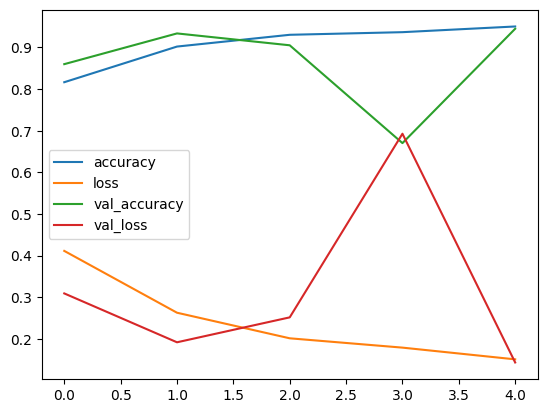

In [26]:
pd.DataFrame(history.history).plot()

In [27]:
model_gender.save('model_gender.h5')

# Age Prediction

In [28]:
y = np.array(data['Age'])
print(X.shape, y.shape)

(10702, 128, 128, 1) (10702,)


In [29]:
tensorflow.keras.backend.clear_session()
model_age = tensorflow.keras.Sequential()


inp = tensorflow.keras.layers.Input((128, 128,1))
c0 = tensorflow.keras.layers.Conv2D(4,3, padding = 'same')(inp)
c0 = tensorflow.keras.layers.MaxPool2D(2)(c0)
c1 = blockc(c0,16,3)
c2 = blockc(c1,32,3)
c3 = blockc(c2,64,3)
c4 = blockc(c3,128,3)
c5 = blockc(c4,64,3)
c6 = blockc(c5,32,3)
c6 =tensorflow.keras.layers.GlobalAveragePooling2D()(c6)
c7 = tensorflow.keras.layers.Flatten()(c6)
c8 = tensorflow.keras.layers.Dense(100,activation='linear')(c7)
c9 = tensorflow.keras.layers.Dense(50,activation='linear')(c8)
out = tensorflow.keras.layers.Dense(1,activation='linear')(c9)
model_age = tensorflow.keras.Model(inputs = [inp], outputs = [out])
 

In [30]:
model_age.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model_age.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 4)    │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 16)     │           592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2, 2, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 199,625 (779.79 KB)

 Trainable params: 198,953 (777.16 KB)

 Non-trainable params: 672 (2.62 KB)

In [31]:
history = model_age.fit(
    X,y,
    steps_per_epoch = (10000//10),
    validation_split=0.2,
    epochs = 10
)

Epoch 1/10


c:\Users\Hello\OneDrive\Desktop\age project\env\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 1))
  warnings.warn(msg)


 949/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 660.5873 - mse: 660.5873

c:\Users\Hello\OneDrive\Desktop\age project\env\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 644.9156 - mse: 644.9156 - val_loss: 176.8177 - val_mse: 176.8177
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 181.9800 - mse: 181.9800 - val_loss: 257.3884 - val_mse: 257.3884
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 149.9297 - mse: 149.9297 - val_loss: 110.5923 - val_mse: 110.5923
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 128.0248 - mse: 128.0248 - val_loss: 112.5216 - val_mse: 112.5216
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 120.5618 - mse: 120.5618 - val_loss: 102.0406 - val_mse: 102.0406
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 113.4454 - mse: 113.4454 - val_loss: 119.2336 - val_mse: 119.2336
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 99.6316 - mse: 99.6316 - val_loss: 87.2574 - val_mse: 87.2574
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 91.8347 - mse: 91.8347 - val_loss: 75.972

<Axes: >

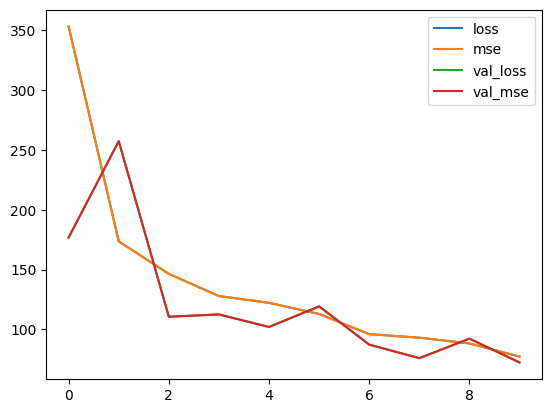

In [32]:
pd.DataFrame(history.history).plot()

In [33]:
model_age.save('model_age.h5')

# Testing the models

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

y_pred = model_gender.predict(X)
pred = []
for i in tqdm(y_pred):
    if i<0.5:
        pred.append(0)
    else:
        pred.append(1)
pred = np.array(pred)

print(pred.shape,y.shape)
print(pred[5:15],gen[5:15])

c:\Users\Hello\OneDrive\Desktop\age project\env\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 128, 128, 1))
  warnings.warn(msg)


335/335 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


c:\Users\Hello\OneDrive\Desktop\age project\env\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 1))
  warnings.warn(msg)
100%|██████████| 10702/10702 [00:00<00:00, 518666.13it/s]

(10702,) (10702,)
[1 1 1 0 1 1 1 1 1 1] 5     1
6     1
7     1
8     0
9     1
10    1
11    1
12    1
13    0
14    1
Name: gender, dtype: int64


In [36]:
pred = np.round(model_age.predict(X))
print(pred[5:15],age[5:15])

335/335 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
[[74.]
 [39.]
 [41.]
 [69.]
 [35.]
 [75.]
 [72.]
 [62.]
 [76.]
 [23.]] 5     62.0
6     52.0
7     46.0
8     83.0
9     33.0
10    82.0
11    78.0
12    61.0
13    74.0
14    28.0
Name: age, dtype: float64


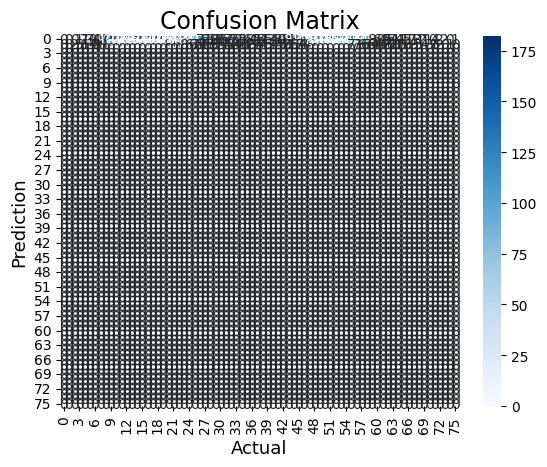

Accuracy   : 0.0
Precision : 0.0
Recall    : 0.0
F1-score  : 0.0


c:\Users\Hello\OneDrive\Desktop\age project\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hello\OneDrive\Desktop\age project\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate the confusion matrix
cm = confusion_matrix(gen, pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

# Compute accuracy
accuracy = accuracy_score(gen, pred)
print("Accuracy   :", accuracy)

# Compute precision, recall, and F1-score for multiclass classification
precision = precision_score(gen, pred, average='macro')  # Options: 'micro', 'macro', 'weighted'
print("Precision :", precision)

recall = recall_score(gen, pred, average='macro')  # Options: 'micro', 'macro', 'weighted'
print("Recall    :", recall)

F1_score = f1_score(gen, pred, average='macro')  # Options: 'micro', 'macro', 'weighted'
print("F1-score  :", F1_score)



In [40]:
from sklearn.metrics import r2_score

p = model_age.predict(X)

print(r2_score(age,p))


335/335 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
0.8406404957214237
